In [194]:
import pandas as pd
import matplotlib.pyplot as plt

In [195]:
import pandas as pd
# Importing data for our chosen portfolio
portfolio = pd.read_csv("top10_long_only.csv")
portfolio["period_end"] = pd.to_datetime(portfolio["period_end"])
# Importing data to get its names
df = pd.read_csv("new_data.csv")

counts = portfolio.groupby("period_end").size()
last_ava_date = counts[counts >= 10].index.max()
current_portfolio = portfolio[portfolio["period_end"] == last_ava_date].sort_values("rank")
current_permnos = current_portfolio["PERMNO"].unique()
# filter mask
permno_mask = df["PERMNO"].isin(current_permnos)
filtered_df = df[permno_mask]
filtered_df["conm"].unique()

filtered_df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,conm,curcd,...,LINKTYPE,LPERMCO,PERMNO,PERMCO,YYYYMM,MthCalDt,MthPrc,MthRet,MthRetx,ShrOut
164,1300,2000-12-31,2000,INDL,C,D,STD,HON,HONEYWELL INTERNATIONAL INC,USD,...,LC,22168,10145.0,22168.0,200012.0,2000-12-29,47.3125,-0.029487,-0.029487,804936.0
165,1300,2001-12-31,2001,INDL,C,D,STD,HON,HONEYWELL INTERNATIONAL INC,USD,...,LC,22168,10145.0,22168.0,200112.0,2001-12-31,33.8200,0.020519,0.020519,813189.0
166,1300,2002-12-31,2002,INDL,C,D,STD,HON,HONEYWELL INTERNATIONAL INC,USD,...,LC,22168,10145.0,22168.0,200212.0,2002-12-31,24.0000,-0.077278,-0.077278,821051.0
167,1300,2003-12-31,2003,INDL,C,D,STD,HON,HONEYWELL INTERNATIONAL INC,USD,...,LC,22168,10145.0,22168.0,200312.0,2003-12-31,33.4300,0.125968,0.125968,862051.0
168,1300,2004-12-31,2004,INDL,C,D,STD,HON,HONEYWELL INTERNATIONAL INC,USD,...,LC,22168,10145.0,22168.0,200412.0,2004-12-31,35.4100,0.002264,0.002264,860168.0


In [198]:
# start from filtered_df, avoid SettingWithCopyWarning
portfolio_data = (filtered_df[["MthCalDt", "conm", "MthPrc"]].copy().rename(columns={"MthCalDt": "Date", "conm": "Firm", "MthPrc": "Annual Price"}))
# make sure Date is datetime
portfolio_data["Date"] = pd.to_datetime(portfolio_data["Date"])

# pivot: rows = Date, columns = Firm, values = Annual Price
price_wide = portfolio_data.pivot_table(index="Date", columns="Firm", values="Annual Price", aggfunc="last").sort_index()
# 
price_wide.loc["2013-12-31"]["AMERICAN AIRLINES GROUP INC"] = 25.25
price_wide


/var/folders/0p/8jbxqm7j40sgzf2dc399pwq80000gn/T/ipykernel_20913/3718630232.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  price_wide.loc["2013-12-31"]["AMERICAN AIRLINES GROUP INC"] = 25.25


Firm,ABBOTT LABORATORIES,ADVANCED MICRO DEVICES,ALASKA AIR GROUP INC,AMERICAN AIRLINES GROUP INC,AMERICAN ELECTRIC POWER CO,HESS CORP,HONEYWELL INTERNATIONAL INC,MATSON INC,PINNACLE WEST CAPITAL CORP,PROG HOLDINGS INC
Date,,,,,,,,,,
2000-12-29,48.4375,13.8125,29.75,39.1875,46.50,73.0625,47.3125,26.25,47.625,13.4375
2001-12-31,55.7500,15.8600,29.10,22.3000,43.53,62.5000,33.8200,26.70,41.850,13.7500
2002-12-31,40.0000,6.4600,21.65,6.6000,27.33,55.0500,24.0000,25.79,34.090,22.9000
2003-12-31,46.6000,14.9000,27.29,12.9500,30.51,53.1700,33.4300,33.75,40.020,18.4900
2004-12-31,46.6500,22.0200,33.49,10.9500,34.34,82.3800,35.4100,42.42,44.410,22.6250
2005-12-30,39.4300,30.6000,35.72,22.2300,37.09,126.8200,37.2500,54.24,41.350,19.4000
2006-12-29,48.7100,20.3500,39.50,30.2300,42.58,49.5700,45.2400,44.34,50.690,26.3800
2007-12-31,56.1500,7.5000,25.01,14.0300,46.56,100.8600,61.5700,51.66,42.410,17.2600
2008-12-31,53.3700,2.1600,29.25,10.6700,33.28,53.6400,32.8300,25.06,32.130,21.9500


<Axes: xlabel='Date'>

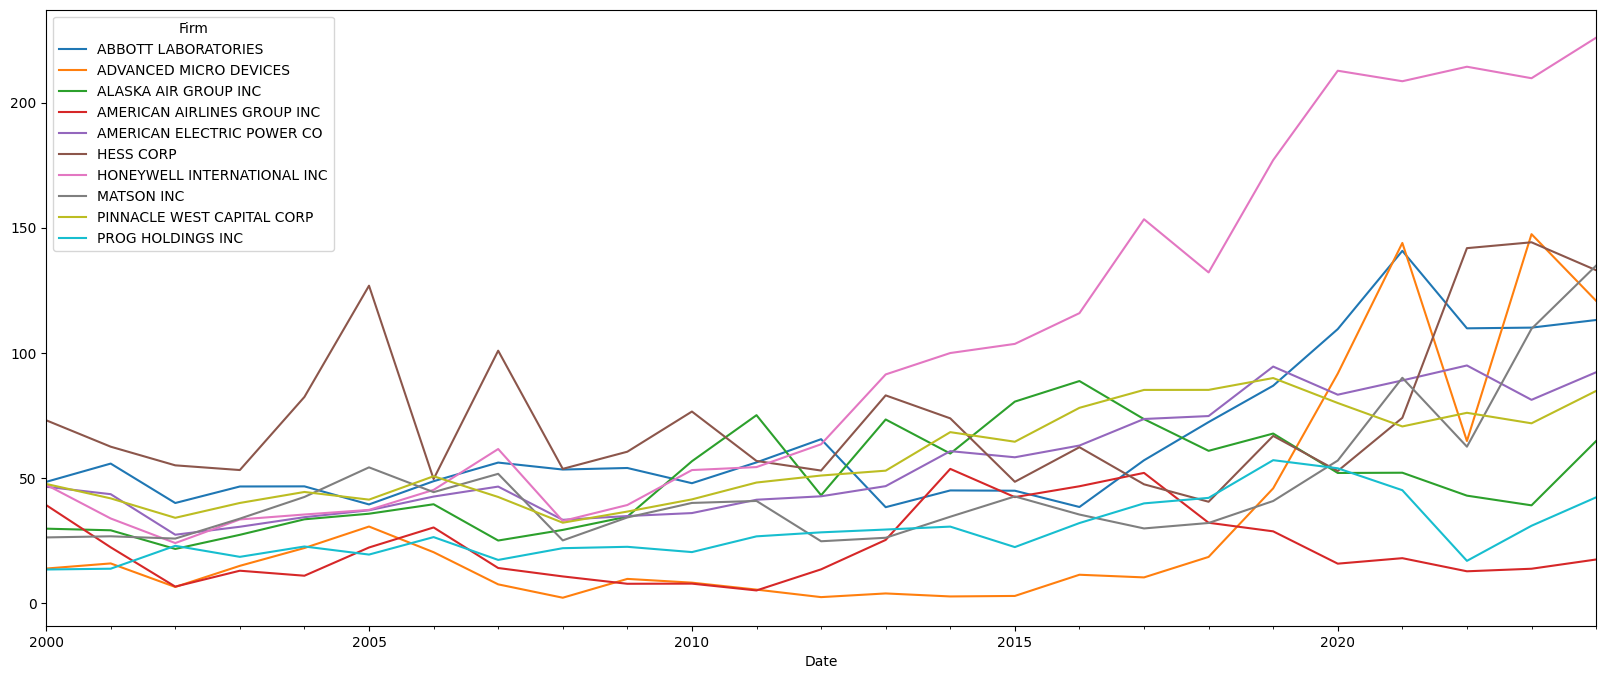

In [197]:
plt.figure(figsize=(20, 8))
price_wide.plot(ax=plt.gca(), legend = True)